<center><font color= 'Black' style = 'font-family:verdana ; font-size:25px'>Advance Regression - Assignment </font></center>
<hr style="color: black; height: 1px;">
<font color= '#067F7D' style = 'font-family:cambria ; font-size:20px'>Problem Statement </font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">Assignment Part-I</font><br>
   - <font color="black" style="font-family:Cambria ;font-size:18px">A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.</font><br>
   
   - <font color="black" style="font-family:Cambria ;font-size:18px">The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.</font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">The company wants to know:</font><br>
   - <font color="black" style="font-family:Cambria ;font-size:18px">Which variables are significant in predicting the price of a house, and</font><br>
   
   - <font color="black" style="font-family:Cambria ;font-size:18px">How well those variables describe the price of a house.</font><br>
   
   - <font color="black" style="font-family:Cambria ;font-size:18px">Also, determine the optimal value of lambda for ridge and lasso regression.</font><br>

<font color= '#067F7D' style = 'font-family:Cambria ; font-size:20px'>Business Problem Overview</font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.</font>

<b><font color=green style='font-family:Cambria; font-size:20px'>To Build A  Model There Are Some Basic Steps :</font></b>
<hr style='height:1px'>

<b><font color=black style='font-family:Cambria; font-size:17px'>1. Data Reading and Understanding:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Load Libraries`: Import necessary libraries like pandas, numpy, matplotlib, and seaborn.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Load Data`: Read your dataset into a DataFrame using pandas.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Explore Data`: Check the first few rows, data types, and summary statistics to understand the dataset.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>2. Data Preprocessing:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Handle Missing Values`: Impute or remove missing values.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Encode Categorical Variables`: Convert categorical variables into numerical format.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Feature Scaling`: Scale numerical features if needed.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>3. Data Visualization:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Correlation Analysis`: Check correlation between variables.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Pair Plots`: Use pair plots to visualize relationships between variables.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Scatter Plots`: Plot scatter plots for individual features against the target variable.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>4. Train-Test Split:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Split Data`: Divide the data into training and testing sets.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>5. Model Building:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Import Model`: Import the Linear Regression model from scikit-learn.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Fit the Model`: Train the model using the training data.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>6. Ridge Regression:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Import Ridge Model`: Import the Ridge Regression model from scikit-learn.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Fit the Ridge Model`: Train the Ridge Regression model using the training data.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Evaluate Ridge Model`: Evaluate the Ridge Regression model using appropriate metrics.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>7. Lasso Regression:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Import Lasso Model`: Import the Lasso Regression model from scikit-learn.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Fit the Lasso Model`: Train the Ridge Regression model using the training data.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Evaluate Lasso Model`: Evaluate the Ridge Regression model using appropriate metrics.</font>

### STEP 1 : DATA UNDERSTANDING AND EXPLORATION

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
 
from notebook.services.config import ConfigManager
cm=ConfigManager().update('notebook',{'limit_output':1000000})
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)

In [2]:
# reading data
df_housing=pd.read_csv('train.csv')
df_housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# shape of the data
df_housing.shape

(1460, 81)

we have 1460 rows and 81 columns

In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# setting the option to display all the columns
pd.set_option('Display.max_rows',500)

In [7]:
# checking percentage for missing values
round(df_housing.isnull().sum()/len(df_housing)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

###### Checking for the outlier

In [8]:
# checking for the outlier
df_housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

In [9]:
df_housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
# checking percentile for the 'Saleprice'
q1=np.percentile(df_housing['SalePrice'],25)
print('q1 is:',q1)
q3=np.percentile(df_housing['SalePrice'],75)
print('q3 is:',q3)
iqr=q3-q1
print('iqr:',iqr)
min=q1-1.5*iqr
print('min:',min)
max=q3+1.5*iqr
print('max:',max)

q1 is: 129975.0
q3 is: 214000.0
iqr: 84025.0
min: 3937.5
max: 340037.5


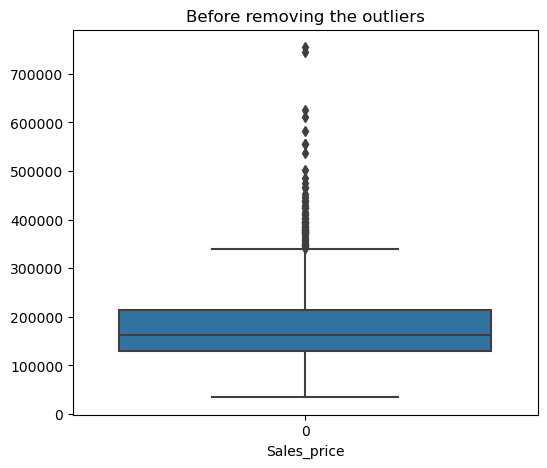

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(df_housing['SalePrice'])
plt.title("Before removing the outliers")
plt.xlabel("Sales_price")
plt.show()

In [12]:
# removing outliers
df_housing=df_housing[(df_housing['SalePrice']>min)&(df_housing['SalePrice']<max)]

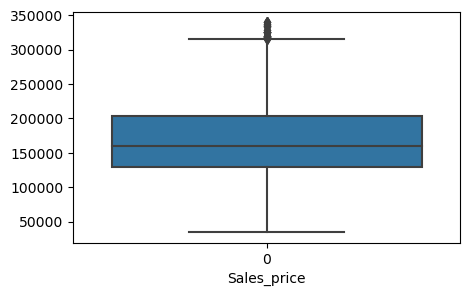

In [13]:
# plotting the boxplot after removing outliers
plt.figure(figsize=(5,3))
sns.boxplot(df_housing['SalePrice'])
plt.xlabel("Sales_price")
plt.show()

In [14]:
# checking the data 
df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [15]:
df_housing.columns[df_housing.isnull().any()]
null=df_housing.isnull().sum()/len(df_housing)*100
null=null[null>0]
null.sort_values(inplace=True,ascending=False)
null

PoolQC          99.571122
MiscFeature     96.140100
Alley           93.495354
Fence           80.200143
FireplaceQu     49.249464
LotFrontage     18.298785
GarageType       5.789850
GarageYrBlt      5.789850
GarageFinish     5.789850
GarageQual       5.789850
GarageCond       5.789850
BsmtExposure     2.716226
BsmtFinType2     2.716226
BsmtFinType1     2.644746
BsmtCond         2.644746
BsmtQual         2.644746
MasVnrArea       0.500357
MasVnrType       0.500357
Electrical       0.071480
dtype: float64

#### According To The Data Dictionary These Columns Have Null Values It Means That It Does Not Contain The Facility So Better To Drop Or Repalce With None Values


In [16]:
# dropping the columns which have more than 80% null values
df_housing=df_housing.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [17]:
df_housing.columns[df_housing.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [18]:
df_housing[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond']]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA


### To address null values, categorical columns should be filled with "None," and numerical columns with the mode. Columns with 80% null values are dropped instead of replacing them with zeros to avoid unnecessary data manipulation.

In [19]:
# filling numerical null values with mode
df_housing['LotFrontage']=df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].mode()[0])
df_housing['GarageYrBlt']=df_housing['GarageYrBlt'].fillna(df_housing['GarageYrBlt'].mode()[0])
df_housing['MasVnrArea']=df_housing['MasVnrArea'].fillna(df_housing['MasVnrArea'].mode()[0])

In [20]:
# filling categorical null values with none
fill_na_cat=['MasVnrType', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond']
for i in fill_na_cat:
    df_housing[i].fillna("none",inplace=True)

In [21]:
# checking again null values
df_housing.isnull().sum()/len(df_housing)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

- <b><font color='teal'> handling null values and missing values is completed</font></b>

In [22]:
# EXPLORING ONE BY ONE COLUMN(cat)
df_housing.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000


In [23]:
# MSZoning:
# C: Commercial
# FV: Floating Village Residential
# RH: Residential High Density
# RL: Residential Low Density
# RM: Residential Medium Densi

In [24]:
df_housing['MSZoning'].value_counts()

RL         1093
RM          216
FV           64
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [25]:
# Street:
df_housing['Street'].value_counts()

Pave    1393
Grvl       6
Name: Street, dtype: int64

In [26]:
# LandSlope
df_housing['LandSlope'].value_counts()

Gtl    1326
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [27]:
# LandContour
df_housing['LandContour'].value_counts()

Lvl    1261
Bnk      63
HLS      41
Low      34
Name: LandContour, dtype: int64

In [28]:
# SaleCondition
df_housing['SaleType'].value_counts()

WD       1238
New        91
COD        43
ConLD       9
ConLw       5
ConLI       4
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [29]:
df_housing['SaleCondition'].value_counts()

Normal     1170
Abnorml     100
Partial      94
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [30]:
# Exploring all the numerical data
df_housing.select_dtypes(include=['int64','float64']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,733.508935,57.487491,67.401001,10155.280915,5.983560,5.591137,1970.080772,1984.058613,89.725518,417.333095,47.478914,559.461758,1024.273767,1132.247320,336.476054,5.690493,1474.413867,0.410293,0.058613,1.540386,0.370264,2.862044,1.048606,6.416726,0.583274,1979.056469,1.717655,458.817012,89.621158,44.892066,22.378127,3.231594,14.634024,2.482487,45.385275,6.312366,2007.819871,170237.127234
std,422.811873,42.803603,21.806144,8324.834198,1.282272,1.118236,30.009463,20.661160,159.219858,428.401771,162.648530,429.378909,407.031806,357.318243,421.440524,47.292646,480.552421,0.514797,0.240995,0.537219,0.500503,0.806081,0.224874,1.544766,0.631804,24.744395,0.721365,204.278673,121.798431,65.718951,61.454480,28.563071,54.752105,38.289681,506.746349,2.703584,1.327762,59230.130817
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.500000,20.000000,60.000000,7442.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,218.000000,788.000000,870.500000,0.000000,0.000000,1119.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,739.000000,50.000000,61.000000,9317.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,370.000000,0.000000,476.000000,973.000000,1069.000000,0.000000,0.000000,1437.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1981.000000,2.000000,471.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1098.500000,70.000000,78.000000,11316.500000,7.000000,6.000000,1999.000000,2003.000000,143.000000,686.000000,0.000000,807.000000,1251.500000,1346.500000,720.000000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,573.000000,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,203500.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,2042.000000,6110.000000,4692.000000,1818.000000,528.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,340000.000000


## <b><font color='BROWN'> EDA </font></b>

In [31]:
# numerical columns
df_housing=df_housing.drop('Id',axis=1)
df_housing_numerical=df_housing.select_dtypes(include=['float64','int64'])
df_housing_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


###  PLOTTING SOME GRAPH COMPARING WITH TRAGET VARIABLE

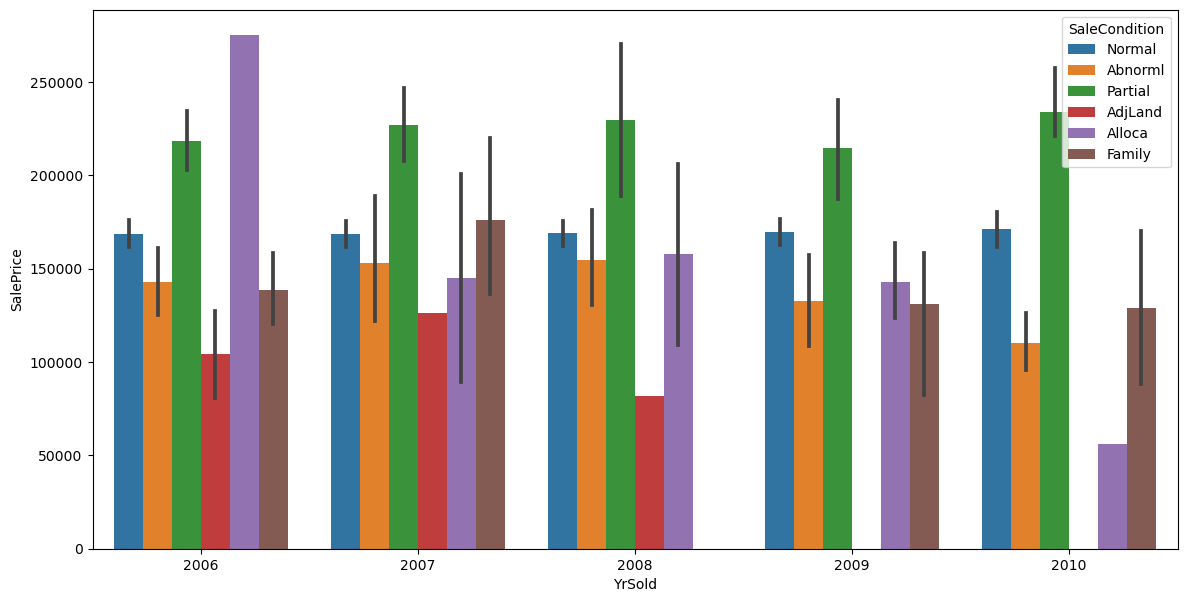

In [32]:
plt.figure(figsize=(14,7))
sns.barplot(data=df_housing,x='YrSold',y='SalePrice',hue='SaleCondition')
plt.show()

- The allocation was high initially, but it has been decreasing every year. Meanwhile, the partial allocation has been increasing annually.
- The purchase of adjoining land saw a significant decrease in 2009 and 2010.

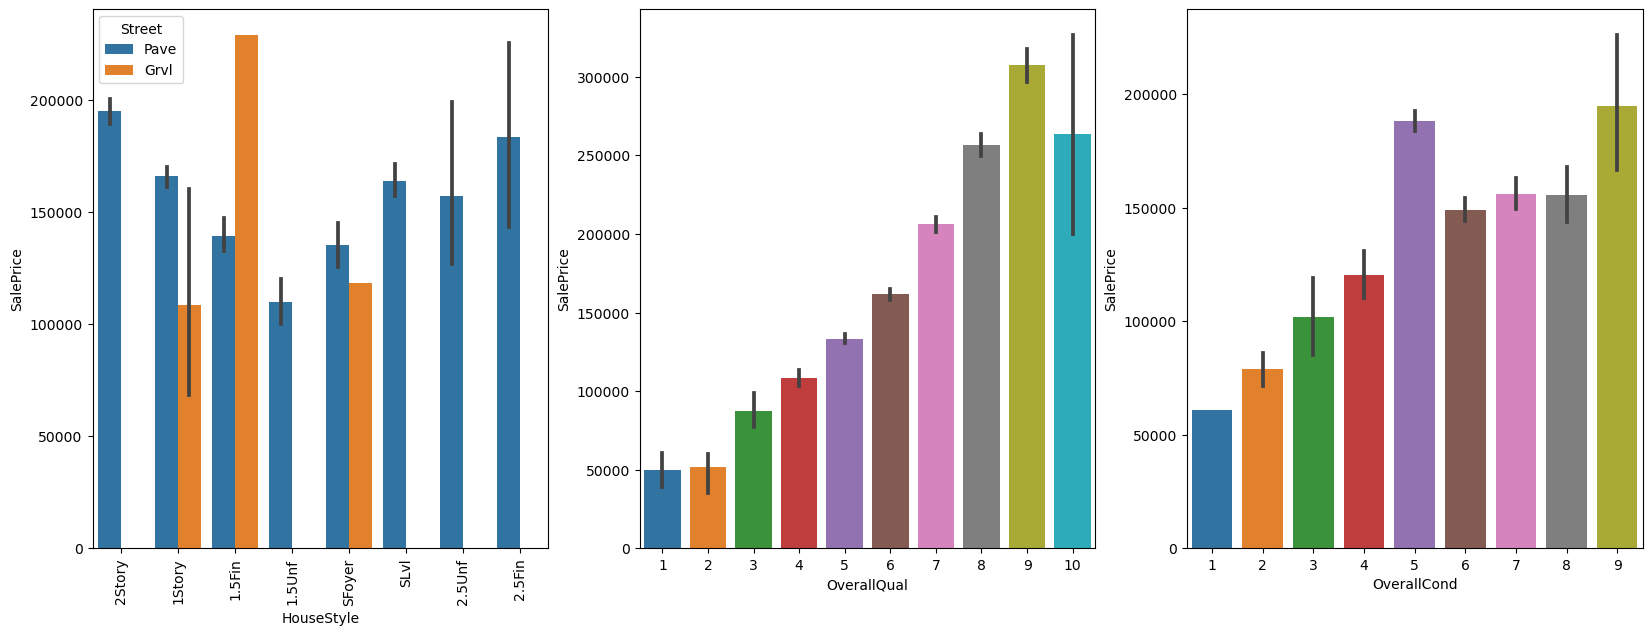

In [33]:
# 1Story One story
#        1.5Fin One and one-half story: 2nd level finished
#        1.5Unf One and one-half story: 2nd level unfinished
#        2Story Two story
#        2.5Fin Two and one-half story: 2nd level finished
#        2.5Unf Two and one-half story: 2nd level unfinished
#        SFoyer Split Foyer
#        SLvl Split Level
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot(data=df_housing,x='HouseStyle',y='SalePrice',hue='Street')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(data=df_housing,x='OverallQual',y='SalePrice')
plt.subplot(1,3,3)
sns.barplot(data=df_housing,x='OverallCond',y='SalePrice')
plt.show()

- <b> Those who live on Pave Street have two-story houses.</b>
- <b> From the above graph, we observe that the rating for the overall material and finish of the houses is consistently increasing day by day.</b>
- <b> Meanwhile, the overall conditions are also on the rise day by day.</b>

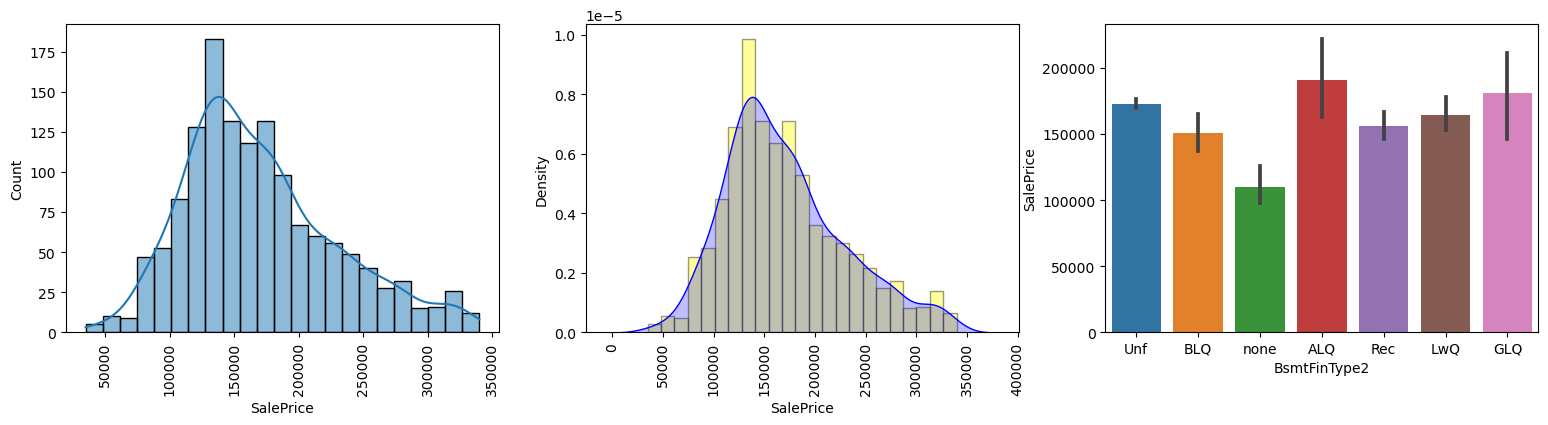

In [34]:
plt.figure(figsize=(19,4))
plt.subplot(1,3,1)
sns.histplot(df_housing['SalePrice'],kde=True)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.distplot(df_housing['SalePrice'],hist_kws={'edgecolor':'black','color':'yellow'},kde_kws={'fill':True,'color':'blue'},)
plt.xticks(rotation=90)
# --------------------------------------------------------
# GLQ Good Living Quarters
#        ALQ Average Living Quarters
#        BLQ Below Average Living Quarters 
#        Rec Average Rec Room
#        LwQ Low Quality
#        Unf Unfinshed
#        NA No Basement
plt.subplot(1,3,3)
sns.barplot(data=df_housing,x='BsmtFinType2',y='SalePrice')
plt.show()

### FROM THE DISTRIBUTION AND HISTOGRAM PLOT, WE HAVE OBSERVED THAT IT IS NORMALLY DISTRIBUTED, SOMEWHAT NOT BAD.
- WHEN IT COMES TO THE RATING OF BASEMENT FINISHED AREA (ALQ - AVERAGE LIVING QUARTERS), IT IS NOTABLE THAT THOSE WITH HIGHER SALARIES PREFER TO RESIDE IN ALQ.

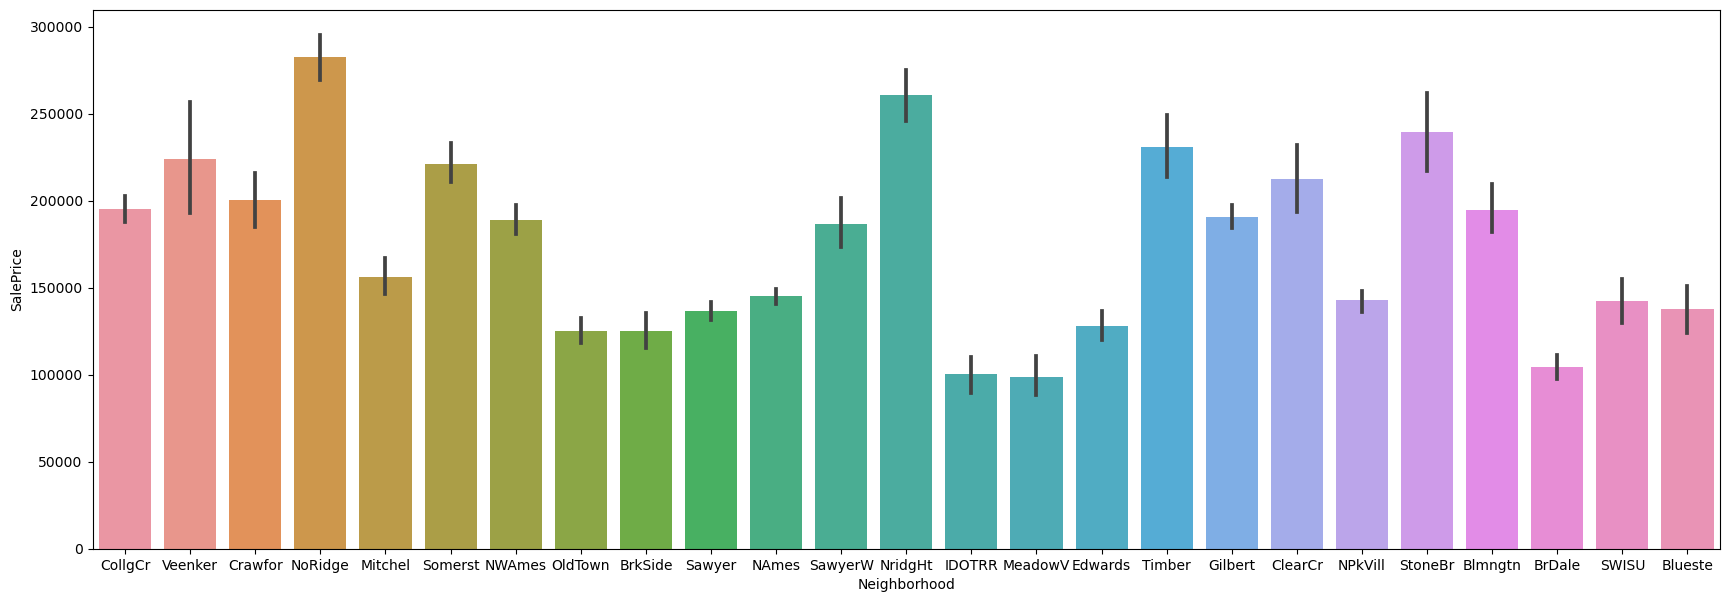

In [35]:
# plotting baarplot of neighborhood and target variable
plt.figure(figsize=(21,7))
sns.barplot(data=df_housing,x='Neighborhood',y='SalePrice')
plt.show()

#### "We Are Creating A New Column Which Is Property Age Based On The Year Of Built And Year Of Sale Of The Property."

In [36]:
df_housing['property_age_years']=df_housing['YrSold']-df_housing['YearBuilt']

<b> <font color='brown'> DRAWING A JOIN PLOT BETWEEN TRAGET VARIABLE & SOME VARIABLES LIKE GrLivArea,LotFrontage,LotArea,OverallQual,1stFlrSF,Electrical,Property_age_years</font></b>

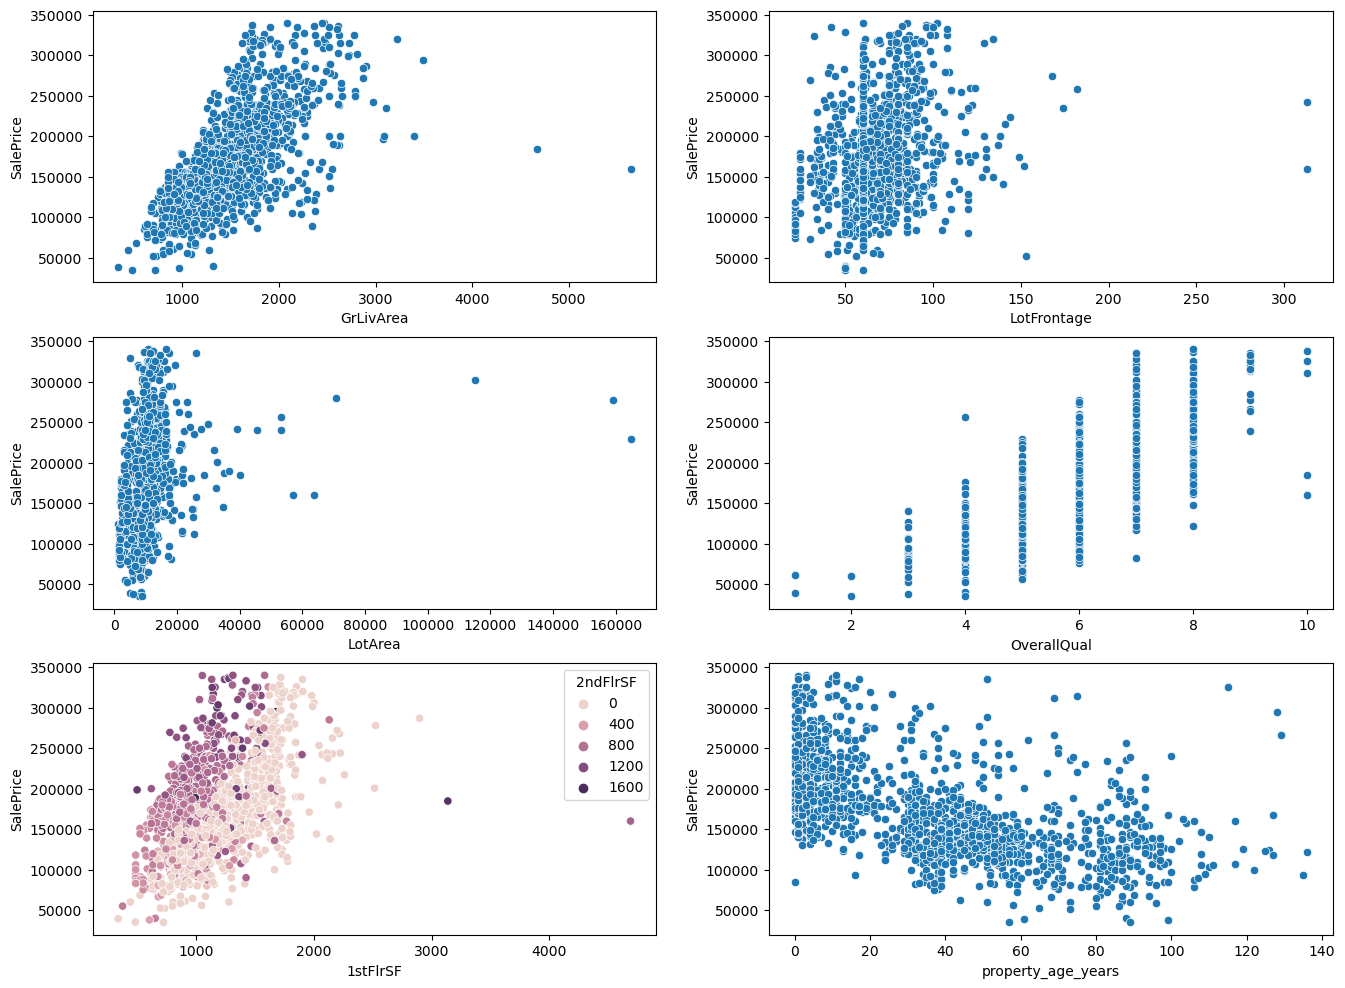

In [37]:
# plotting GrLivArea vs saleprice
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.scatterplot(data=df_housing,x='GrLivArea',y="SalePrice")
# plotting LotFrontage vs saleprice
plt.subplot(3,2,2)
sns.scatterplot(data=df_housing,x='LotFrontage',y="SalePrice")
# plotting LotArea vs saleprice
plt.subplot(3,2,3)
sns.scatterplot(data=df_housing,x='LotArea',y="SalePrice")
# plotting OverallQual vs saleprice
plt.subplot(3,2,4)
sns.scatterplot(data=df_housing,x='OverallQual',y="SalePrice")
# plotting 1stFlrSF vs saleprice
plt.subplot(3,2,5)
sns.scatterplot(data=df_housing,x='1stFlrSF',y="SalePrice",hue='2ndFlrSF')
# plotting Property_age_years vs saleprice
plt.subplot(3,2,6)
sns.scatterplot(data=df_housing,x='property_age_years',y="SalePrice")

plt.show()

Checking Relation

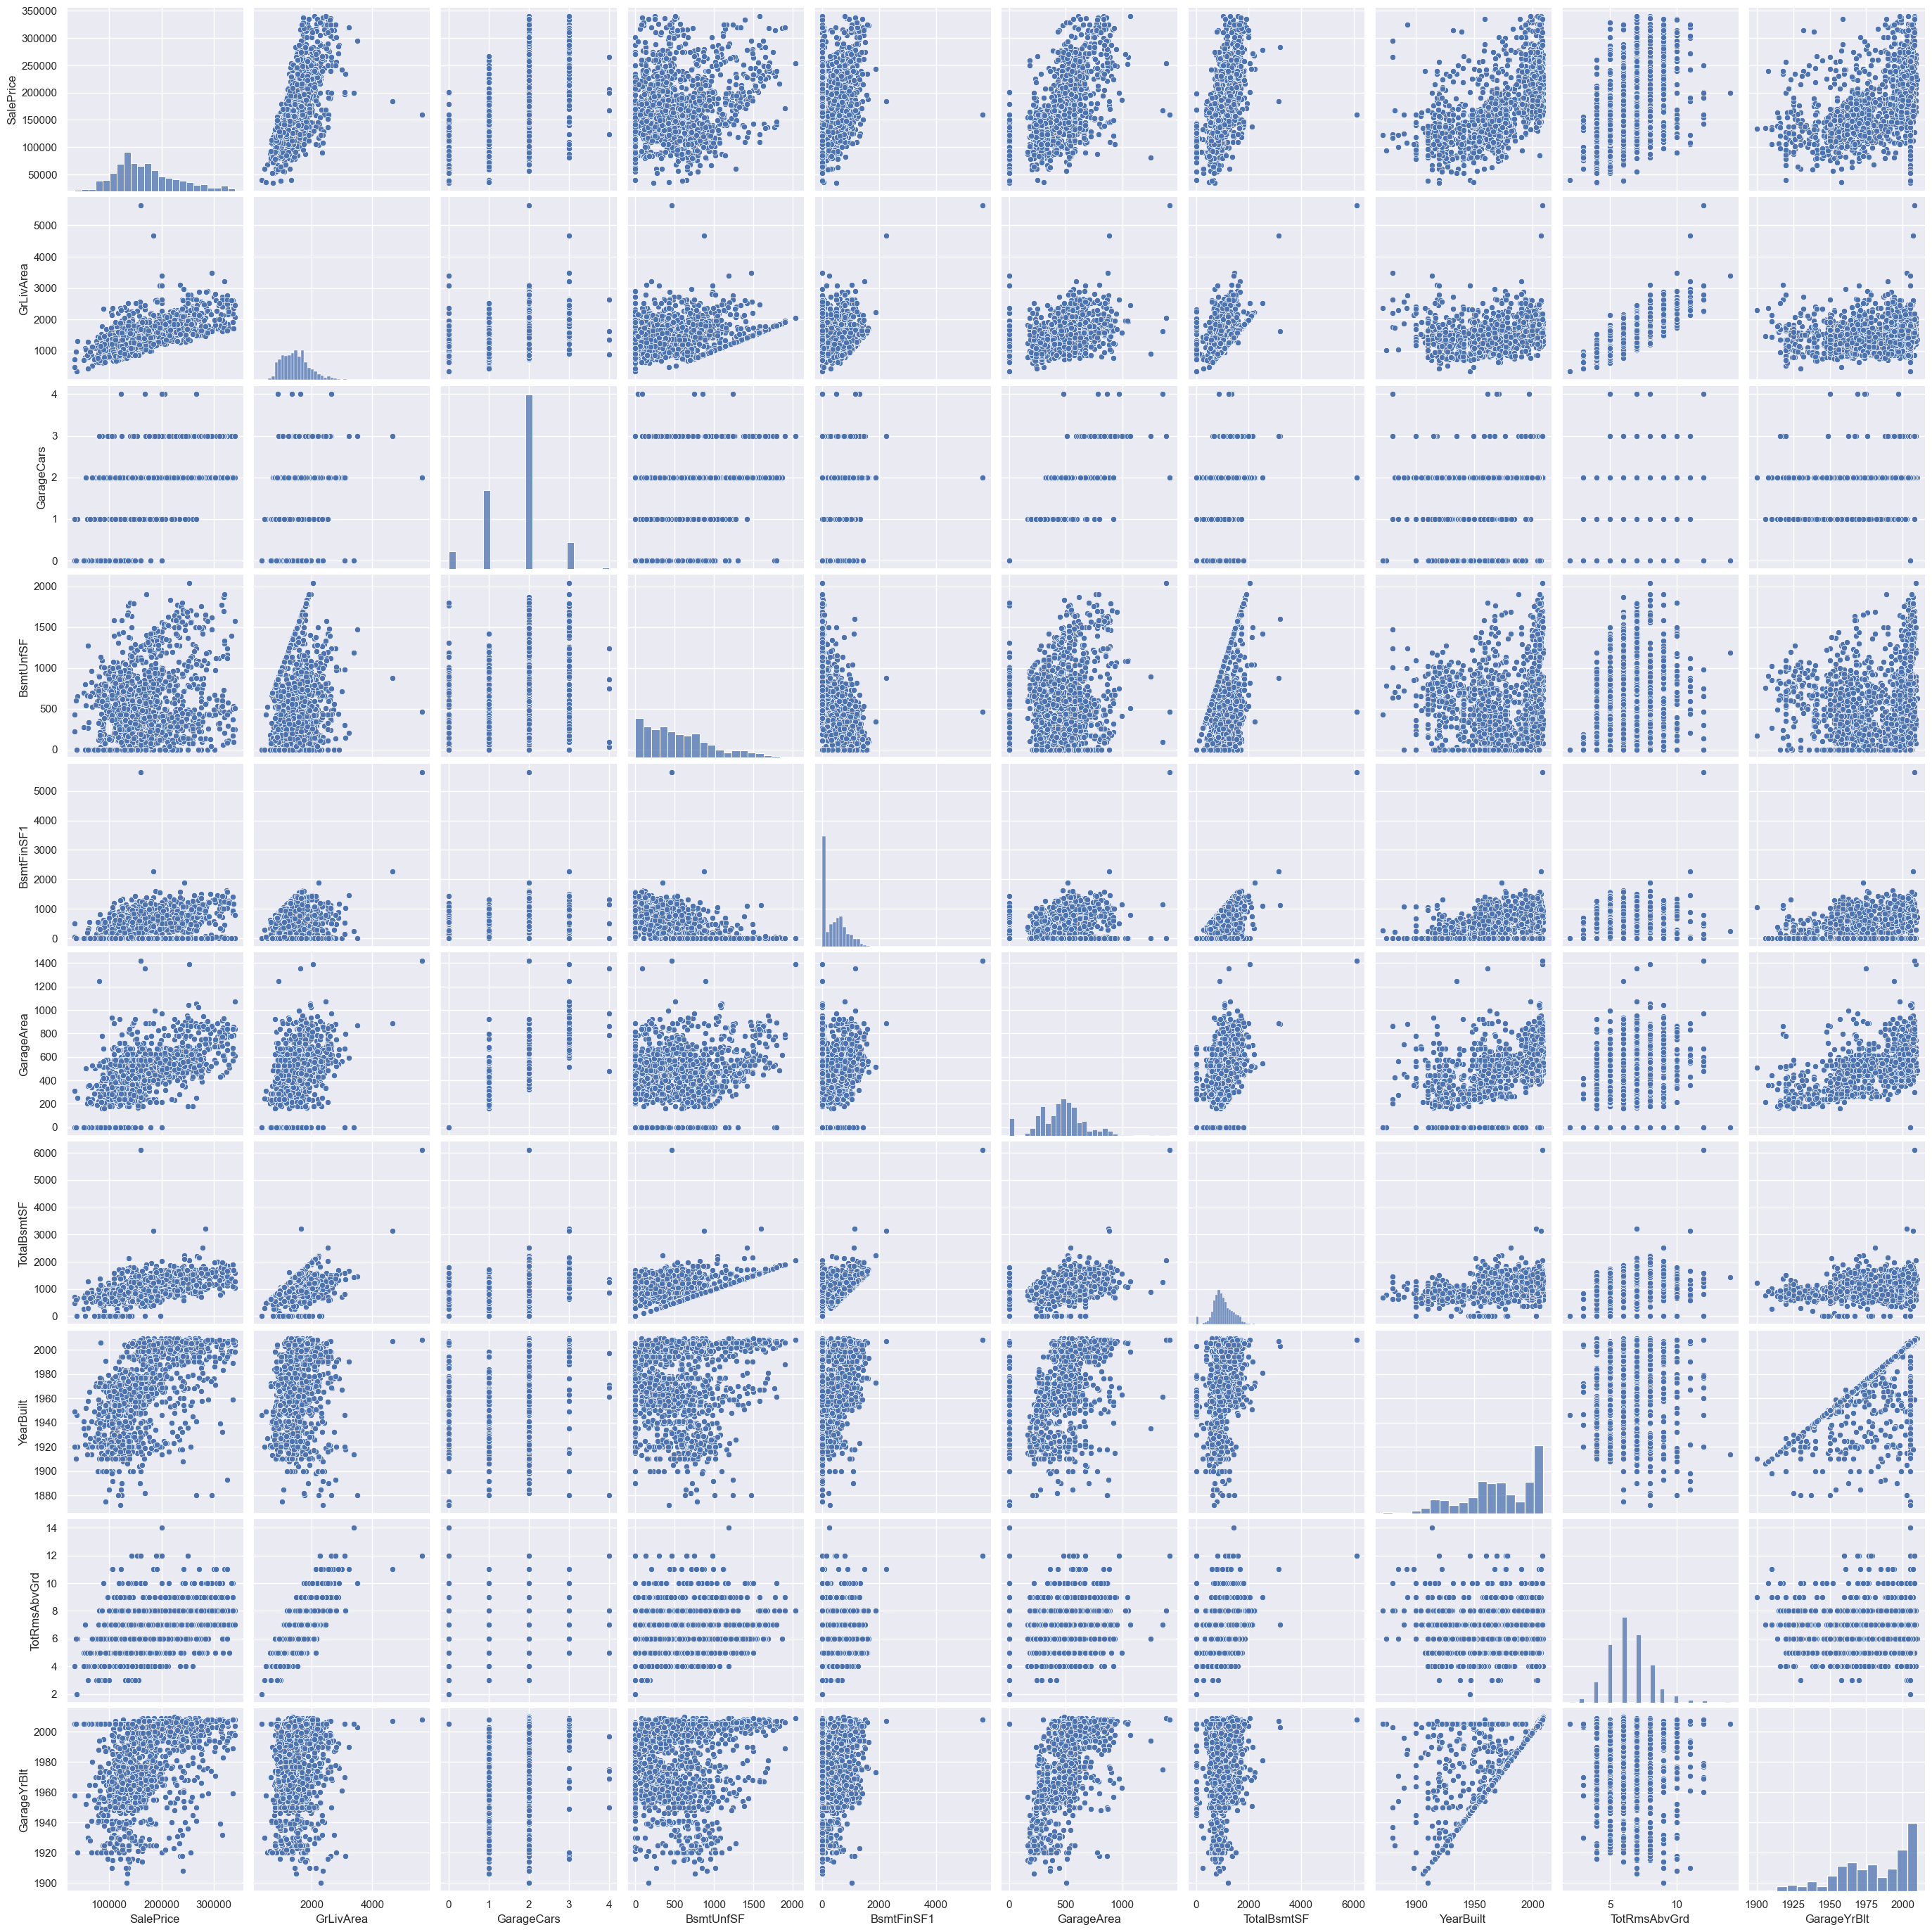

In [38]:
# checing same with pairplot
sns.set()
cols=['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data=df_housing[cols],size=2.8)
plt.show()

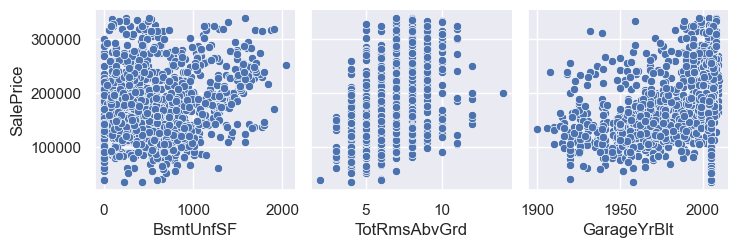

In [39]:
sns.pairplot(data=df_housing,x_vars=['BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'],y_vars='SalePrice')
plt.show()

In [40]:
# checking correlation
df_housing[['BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt','SalePrice']].corr()


,BsmtUnfSF,TotRmsAbvGrd,GarageYrBlt,SalePrice
BsmtUnfSF,1.000000,0.240316,0.164214,0.222795
TotRmsAbvGrd,0.240316,1.000000,0.069166,0.472292
GarageYrBlt,0.164214,0.069166,1.000000,0.393420
SalePrice,0.222795,0.472292,0.393420,1.000000


- DROPPING THOSE COLUMN WHICH THEY ARE NOT CORRELETED WITH SALE PRICE

In [41]:
df_housing=df_housing.drop(['BsmtUnfSF'],axis=1)
df_housing=df_housing.drop(['TotRmsAbvGrd'],axis=1)
df_housing=df_housing.drop(['GarageYrBlt'],axis=1)

In [42]:
df_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,property_age_years
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,8


##### "DROPPING SOME COLUMNS THAT ARE NOT REQUIRED FURTHER, WHICH HAVE THE LEAST CORRELATION AND ARE ALSO NOT RELEVANT TO US."

In [43]:
df_housing=df_housing.drop(['YearBuilt','MoSold','YrSold','YearRemodAdd'],axis=1)

In [44]:
df_housing['Street'].value_counts()

Pave    1393
Grvl       6
Name: Street, dtype: int64

In [45]:
df_housing['Utilities'].value_counts()

AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64

In [46]:
len(df_housing[['Utilities','Street','Condition2','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrArea','BsmtExposure','BsmtFinType1','Heating',
                'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','SaleType','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']].columns)

19

In [47]:
df_housing[['Utilities','Street','Condition2','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrArea','BsmtExposure','BsmtFinType1','Heating',
                'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','SaleType','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']].head()

,Utilities,Street,Condition2,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtExposure,BsmtFinType1,Heating,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,SaleType,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,AllPub,Pave,Norm,CompShg,VinylSd,VinylSd,196.0,No,GLQ,GasA,0,0,1,WD,0,0,0,0,208500
1,AllPub,Pave,Norm,CompShg,MetalSd,MetalSd,0.0,Gd,ALQ,GasA,0,1,1,WD,0,0,0,0,181500
2,AllPub,Pave,Norm,CompShg,VinylSd,VinylSd,162.0,Mn,GLQ,GasA,0,0,1,WD,0,0,0,0,223500
3,AllPub,Pave,Norm,CompShg,Wd Sdng,Wd Shng,0.0,No,ALQ,GasA,0,0,1,WD,0,0,0,0,140000
4,AllPub,Pave,Norm,CompShg,VinylSd,VinylSd,350.0,Av,GLQ,GasA,0,0,1,WD,0,0,0,0,250000


In [48]:
df_housing.Utilities.value_counts()

AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64

In [49]:
c=df_housing[['Utilities','Street','Condition2','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrArea','BsmtExposure','BsmtFinType1','Heating',
                'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','SaleType','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]

In [50]:
d=c.corr()

In [51]:
d

,MasVnrArea,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
MasVnrArea,1.000000,-0.067856,0.031197,-0.026438,0.015367,0.069776,0.026999,-0.026690,0.350541
LowQualFinSF,-0.067856,1.000000,-0.004683,0.008612,-0.002948,-0.032183,0.071475,-0.003693,-0.058086
BsmtHalfBath,0.031197,-0.004683,1.000000,-0.039409,0.023590,0.037352,0.023909,-0.007858,-0.018827
KitchenAbvGr,-0.026438,0.008612,-0.039409,1.000000,-0.024472,-0.052061,-0.014024,0.061603,-0.147385
3SsnPorch,0.015367,-0.002948,0.023590,-0.024472,1.000000,-0.030261,-0.007341,0.000930,0.043324
ScreenPorch,0.069776,-0.032183,0.037352,-0.052061,-0.030261,1.000000,0.060575,0.033939,0.108851
PoolArea,0.026999,0.071475,0.023909,-0.014024,-0.007341,0.060575,1.000000,0.032456,0.048682
MiscVal,-0.026690,-0.003693,-0.007858,0.061603,0.000930,0.033939,0.032456,1.000000,-0.012872
SalePrice,0.350541,-0.058086,-0.018827,-0.147385,0.043324,0.108851,0.048682,-0.012872,1.000000


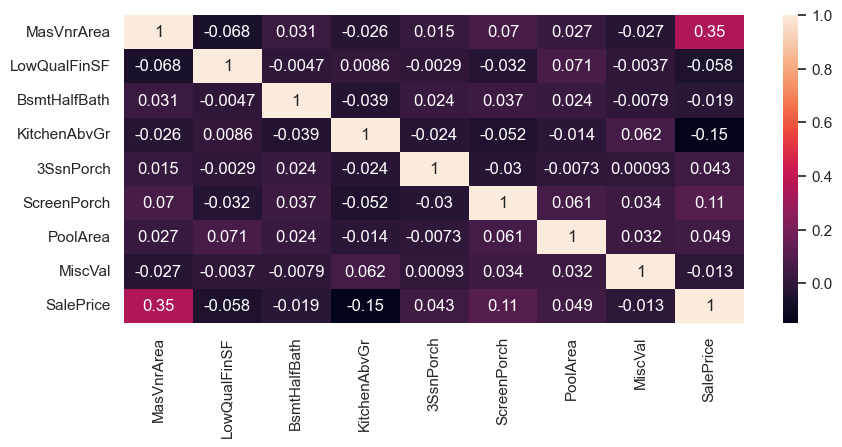

In [52]:
# plotting heatmap
plt.figure(figsize=(10,4))
sns.heatmap(d,annot=True)
plt.show()

In [53]:
# exploring catogorical variables
c.select_dtypes('object').columns

Index(['Utilities', 'Street', 'Condition2', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'SaleType'],
      dtype='object')

In [54]:
c['Utilities'].value_counts()

AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64

In [55]:
c['Street'].value_counts()

Pave    1393
Grvl       6
Name: Street, dtype: int64

In [56]:
c['Condition2'].value_counts()

Norm      1385
Feedr        6
Artery       2
RRNn         2
PosN         1
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [57]:
c['RoofMatl'].value_counts()

CompShg    1376
Tar&Grv      11
WdShake       5
WdShngl       3
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [58]:
c['Exterior1st'].value_counts()

VinylSd    479
HdBoard    220
MetalSd    217
Wd Sdng    203
Plywood    107
CemntBd     52
BrkFace     47
WdShing     24
Stucco      23
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [59]:
c['Exterior2nd'].value_counts()

VinylSd    468
MetalSd    211
HdBoard    205
Wd Sdng    194
Plywood    142
CmentBd     51
Wd Shng     35
Stucco      25
BrkFace     23
AsbShng     20
ImStucc      8
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [60]:
c['BsmtExposure'].value_counts()

No      941
Av      205
Mn      108
Gd      107
none     38
Name: BsmtExposure, dtype: int64

In [61]:
c['BsmtFinType1'].value_counts()

Unf     419
GLQ     372
ALQ     218
BLQ     147
Rec     132
LwQ      74
none     37
Name: BsmtFinType1, dtype: int64

In [62]:
c['MiscVal'].value_counts()

0        1347
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [63]:
c['PoolArea'].value_counts()

0      1393
512       1
648       1
576       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [64]:
df_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,property_age_years
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8


In [65]:
df_housing=df_housing.drop(['Utilities','Street','Condition2','RoofMatl','Heating','GarageCars'
                ,'SaleType','3SsnPorch','OverallCond','Functional','GarageCond','MSSubClass','LowQualFinSF'],axis=1)

In [66]:
df_housing.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SaleCondition', 'SalePrice', 'property_age_years'],
      dtype='object')

In [67]:
df_housing.shape

(1399, 57)

In [68]:
# the eda has completed further we will do data preparation

## <b><font color='BROWN'> Data Preparation </font></b>

In [69]:
df_housing_catogorical=df_housing.select_dtypes(['object'])
df_housing_numerical=df_housing.select_dtypes(['float64','int64'])

In [70]:
# displaying categorical 
df_housing_catogorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,none,Attchd,RFn,TA,Y,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,Y,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,Y,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Gd,Gd,Detchd,Unf,TA,Y,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,Y,Normal


In [71]:
df_housing_catogorical.shape

(1399, 31)

In [72]:
# displaying numerical 
df_housing_numerical.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,property_age_years
0,65.0,8450,7,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,208500,5
1,80.0,9600,6,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,181500,31
2,68.0,11250,7,162.0,486,0,920,920,866,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,223500,7
3,60.0,9550,7,0.0,216,0,756,961,756,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,140000,91
4,84.0,14260,8,350.0,655,0,1145,1145,1053,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,250000,8


In [73]:
df_housing_numerical.shape

(1399, 26)

### Numerica Columns

In [74]:
df_housing_numerical.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'property_age_years'],
      dtype='object')

### Catogorical Columns

In [75]:
df_housing_catogorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [76]:
# transforming the saleprice into log
df_housing['SalePrice']=np.log1p(df_housing['SalePrice'])
df_housing['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1399, dtype: float64

In [77]:
df_housing.head(4)

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,property_age_years
0,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,Normal,12.247699,5
1,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,Normal,12.109016,31
2,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,Normal,12.317171,7
3,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,Abnorml,11.849405,91


### creating dummies for catogorical variable ("one hot coding")

In [78]:
# creating dummies
df_housing=pd.get_dummies(df_housing,drop_first=True)
df_housing.head(4)

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,80.0,9600,6,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0

### Dividing X and Y Terms

In [79]:
y=df_housing.pop('SalePrice')
y.head(5)
# return and removes it

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [80]:
X=df_housing
X.head(4)

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,80.0,9600,6,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1

In [81]:
# splitting into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

In [82]:
print(f"THE SHAPE OF THE X TRAIN IS : {X_train.shape} ")
print(f"THE SHAPE OF THE X test IS : {X_test.shape} ")
print(f"THE SHAPE OF THE y TRAIN IS : {y_train.shape} ")
print(f"THE SHAPE OF THE y TRAIN IS : {y_test.shape} ")

THE SHAPE OF THE X TRAIN IS : (979, 197) 
THE SHAPE OF THE X test IS : (420, 197) 
THE SHAPE OF THE y TRAIN IS : (979,) 
THE SHAPE OF THE y TRAIN IS : (420,) 


In [83]:
X_train.head(4)

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
162,95.0,12182,7,226.0,1201,0,1541,1541,0,1541,0,0,2,0,3,1,1,532,0,70,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
743,70.0,12886,5,0.0,444,0,520,1464,0,1464,0,1,2,0,3,1,1,480,302,0,0,100,0,0,46,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1

## scaling feature

- <b> We Are First Creating The Numerical Columns, Then Scaling Them, And Finally Concatenating Them To The Training Data, Whatever It May Be.</b>

In [84]:
# extracting numerical columns
X_train.select_dtypes(["float64","int64"]).columns


Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'property_age_years'],
      dtype='object')

In [85]:
# standardising the value
scaler=MinMaxScaler()
X_train[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'property_age_years']]=scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'property_age_years']])


X_test[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
           'property_age_years']]=scaler.fit_transform(X_test[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'property_age_years']])

In [86]:
# extracting numerical columns
X_train.select_dtypes(['float64','int64']).head(4)

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,property_age_years
162,0.253425,0.094174,0.666667,0.14125,0.212792,0.0,0.252209,0.276962,0.000000,0.227393,0.000000,0.0,0.666667,0.0,0.5,0.0,0.333333,0.375176,0.000000,0.127971,0.0,0.000000,0.0,0.0,0.036765
743,0.167808,0.100368,0.444444,0.00000,0.078668,0.0,0.085106,0.259293,0.000000,0.212886,0.000000,0.5,0.666667,0.0,0.5,0.0,0.333333,0.338505,0.414835,0.000000,0.0,0.208333,0.0,0.0,0.338235
1271,0.133562,0.067554,0.555556,0.00000,0.000000,0.0,0.243699,0.265030,0.000000,0.217596,0.000000,0.0,0.666667,0.0,0.5,0.0,0.333333,0.325811,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.301471
1110,0.133562,0.057384,0.555556,0.00000,0.038802,0.0,0.126514,0.100734,0.486799,0.249435,0.333333,0.0,0.666667,0.5,0.5,0.0,0.333333,0.303949,0.307692,0.153565,0.0,0.000000,0.0,0.0,0.095588


In [87]:
X_train.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
162,0.253425,0.094174,0.666667,0.14125,0.212792,0.000000,0.252209,0.276962,0.000000,0.227393,0.000000,0.0,0.666667,0.0,0.5,0.0,0.333333,0.375176,0.000000,0.127971,0.0,0.000000,0.0,0.0,0.036765,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
743,0.167808,0.100368,0.444444,0.00000,0.078668,0.000000,0.085106,0.259293,0.000000,0.212886,0.000000,0.5,0.666667,0.0,0.5,0.0,0.333333,0.338505,0.414835,0.000000,0.0,0.208333,0.0,0.0,0.338235,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [88]:
X_test.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,property_age_years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
138,0.178082,0.047539,0.714286,0.283437,0.355319,0.0,0.451642,0.215735,0.526381,0.441953,0.0,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.474820,0.304348,0.202677,0.000000,0.000000,0.0,0.0,0.069767,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
212,0.174658,0.044931,0.571429,0.000000,0.437234,0.0,0.404858,0.185921,0.571074,0.441953,0.5,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.463309,0.228261,0.206501,0.000000,0.000000,0.0,0.0,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0

In [89]:
# shape of the xtest
X_test.shape

(420, 197)

In [90]:
# shape of the xtrain
X_train.shape

(979, 197)

### Model Building And Evaluation

In [91]:
# linear regression 
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [92]:
# Rfe
rfe=RFE(estimator=lm,n_features_to_select=100)
rfe=rfe.fit(X_train,y_train)

In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 16),
 ('BsmtFinSF2', False, 53),
 ('TotalBsmtSF', False, 6),
 ('1stFlrSF', False, 43),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 81),
 ('Fireplaces', False, 89),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 11),
 ('OpenPorchSF', False, 22),
 ('EnclosedPorch', False, 37),
 ('ScreenPorch', False, 29),
 ('PoolArea', True, 1),
 ('MiscVal', False, 31),
 ('property_age_years', False, 69),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 71),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 72),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('LotConfig_CulDSac', False, 9

In [94]:
# the columns which  support rfe
col=X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'GarageArea', 'PoolArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_RRAn', 'Condition1_RRNn', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_2.5Unf', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_ImStucc', 'Exteri

In [95]:
len(col)

100

In [96]:
# the columns which does not support rfe
X_train.columns[~rfe.support_]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'KitchenAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MiscVal', 'property_age_years', 'LotShape_IR2',
       'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber',
       'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNe', 'BldgType_2fmCon',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Shed',
       'Exterior

### Printing The Predicted Values For The Train And Test Cases, And Also Displaying Their Intercepts And Coefficients..

In [97]:
# predicting y train
y_train_pred=lm.predict(X_train)
y_train_pred

array([12.32168651, 12.0138634 , 11.99951954, 12.17785072, 11.40546499,
       11.68910819, 12.36043004, 12.41365071, 11.63402876, 11.73528372,
       12.29939912, 11.71387736, 11.64851971, 12.17249254, 12.11346312,
       11.85133361, 11.4833024 , 11.79988378, 12.08651116, 11.85655629,
       11.9040954 , 11.83094401, 11.97687438, 12.53488636, 11.51779503,
       12.10789713, 11.91724211, 11.24026825, 11.40168923, 11.68078576,
       12.64627119, 12.03830998, 12.07644268, 12.6163053 , 12.16490265,
       11.86840759, 12.26734464, 11.94357843, 12.04377889, 11.35693407,
       11.84730136, 12.07658936, 12.51045796, 12.18347539, 11.85529272,
       12.00556914, 12.03231319, 12.12320344, 11.78898965, 12.58653176,
       11.39460462, 12.43874608, 11.88681014, 12.37197264, 12.09985093,
       11.97776908, 12.14064032, 11.65807182, 11.99818944, 11.78655055,
       12.33124963, 12.09567772, 11.69228678, 11.82160104, 11.58259862,
       12.3784716 , 12.06770997, 11.79175316, 11.97136256, 11.99

In [98]:
# predicting y train
y_test_pred=lm.predict(X_test)
y_test_pred

array([ 1.25079249e+01,  1.26275090e+01, -1.93585450e+10,  1.18154066e+01,
        1.18977962e+01,  1.24450624e+01,  1.17351220e+01,  1.25071932e+01,
        1.16338895e+01,  1.21418214e+01,  1.30561704e+01,  1.25843747e+01,
        1.22144160e+01,  1.19735564e+01,  1.25748559e+01,  1.18575661e+01,
        1.21019528e+01,  1.30365334e+01,  1.23554489e+01,  1.25044813e+01,
        1.19144801e+01,  1.15651912e+01,  1.18110494e+01,  1.14426634e+01,
        1.22096509e+01,  1.25790228e+01,  1.16662243e+01,  1.14557048e+01,
        1.18066651e+01,  1.21351934e+01,  1.24803090e+01,  1.14065348e+01,
        1.21171597e+01,  1.16406111e+01,  1.17121000e+01,  1.21139956e+01,
        1.11197972e+01,  1.16121918e+01,  1.20296981e+01,  1.21770349e+01,
        1.20014334e+01,  1.16796035e+01,  1.16994522e+01,  1.18048511e+01,
        1.23388960e+01,  1.18387770e+01,  1.19121108e+01,  1.16006089e+01,
        1.17996710e+01,  1.16120808e+01,  1.23173908e+01,  1.17007029e+01,
        1.19962989e+01,  

#### Intercept And Coefficient values

In [99]:
# printing coefficient
print('COEFFICIENT IS:',lm.coef_)


COEFFICIENT IS: [-1.95959995e-01  2.77481653e-01  5.03029258e-01 -8.18062712e-02
 -1.49693215e-01  2.05501535e-02 -8.10703795e-03 -1.01871006e+00
 -4.11763612e-01  2.33552433e+00  1.39594952e-01  6.28047251e-02
  1.07863580e-01  5.24088527e-02  1.45680565e-01 -9.29332316e-03
 -5.96306119e-03  2.26996122e-01  5.49486399e-02  1.32086994e-01
  5.40047513e-02  1.26192901e-01 -5.55053073e-01  8.27892395e-02
 -9.77129737e-04  3.69902551e-01  3.45339125e-01  3.35042772e-01
  3.03614243e-01 -1.27529437e-02 -8.26279418e-02  5.51454043e-03
  1.19943953e-01  5.70016178e-02  6.73187885e-02  1.91109966e-02
 -3.48530051e-02 -1.01251327e-01 -2.78487429e-02 -2.64707782e-02
 -1.39751898e-01  7.79750810e+11 -7.75195555e-02 -4.66466562e-02
 -2.80064825e-03 -6.06183971e-03  1.38030131e-01 -1.09746689e-01
 -8.51984300e-04 -9.51007083e-02 -2.31169991e-01 -5.97615154e-02
 -5.35653249e-02 -3.50174046e-02 -4.16004475e-02  7.22632450e-02
  1.46847413e-01 -1.02363218e-01 -7.76408294e-02 -6.37228592e-02
  1.07128

In [100]:
# PRINTING INTERCEPT
print('INTERCEPT IS:',lm.intercept_)

INTERCEPT IS: 10.756585007584993


###    R^2 Score

In [101]:
print('R^2 score for training set is:',r2_score(y_train,y_train_pred))
print('R^2 score for test set is:',r2_score(y_test,y_test_pred))

R^2 score for training set is: 0.8953740796479799
R^2 score for test set is: -2.3788870609458044e+22


- <b> The R^2 value for the training set is 0.89, indicating a reasonably good fit of the model to the training data. However, the R^2 value for the test set is -2.37</b>

In [102]:
metric_linear=[]
# calculating r^2 value for  train 
r2_score_for_train=r2_score(y_train,y_train_pred)
print("r2_score_for_train is:",r2_score_for_train)
metric_linear.append(r2_score_for_train)

# calculating r^2 value for  test 
r2_score_for_test=r2_score(y_test,y_test_pred)
print("r2_score_for_test is:",r2_score_for_test)
metric_linear.append(r2_score_for_test)

# calculating RSS for train
rss_for_train=np.sum(np.square(y_train-y_train_pred))
print("rss_for_train is:",rss_for_train)
metric_linear.append(rss_for_train)

# calculating RSS for test
rss_for_test=np.sum(np.square(y_test-y_test_pred))
print("rss_for_test is:",rss_for_test)
metric_linear.append(rss_for_test)

# # calculating MSE for train
mse_for_train=mean_squared_error(y_train,y_train_pred)
print("mse_for_train is:",mse_for_train)
metric_linear.append(mse_for_train)

# calculating MSE for test
mse_for_test=mean_squared_error(y_test,y_test_pred)
print("mse_for_test is:",mse_for_test)
metric_linear.append(mse_for_test)

# # calculating RMSE for train
rmse_for_train=mse_for_train**0.5
print("rmse_for_train is:",rmse_for_train)
metric_linear.append(rmse_for_train)

# calculating RMSE for test
rmse_for_test=mse_for_test**0.5
print("rmse_for_test is:",rmse_for_test)
metric_linear.append(rmse_for_test)

r2_score_for_train is: 0.8953740796479799
r2_score_for_test is: -2.3788870609458044e+22
rss_for_train is: 12.900444807741287
rss_for_test is: 1.249191002050747e+24
mse_for_train is: 0.013177165278591713
mse_for_test is: 2.9742642905970167e+21
rmse_for_train is: 0.1147918345466772
rmse_for_test is: 54536815919.1295


In [103]:
# RSS
rss=y_train-y_train_pred

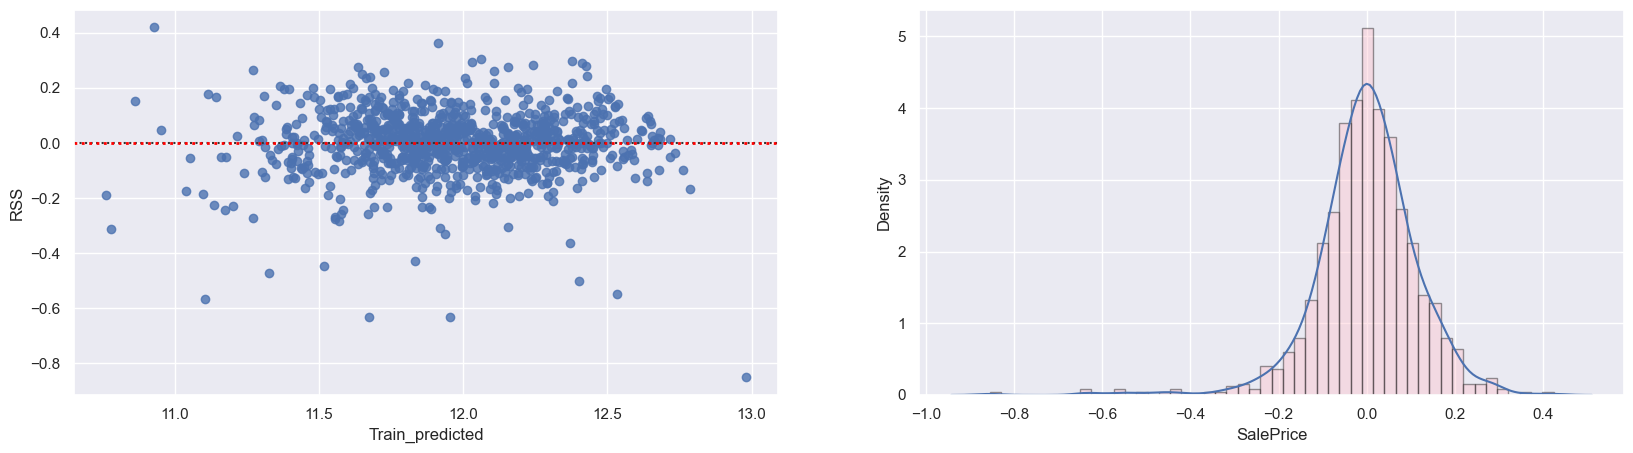

In [104]:
# plotting the scatterplot y_train_pred vs rss
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.residplot(x=y_train_pred,y=rss)
plt.axhline(y=0,linewidth=2,color='red',linestyle=':')
plt.xlabel("Train_predicted")
plt.ylabel("RSS")
plt.subplot(1,2,2)
sns.distplot(rss,hist_kws={'edgecolor':'black','facecolor':'pink'}) 
plt.show()

- If We Observe The Following Graph, We Notice That The Residual Plot Looks Good; However, There Is A Slight Pattern That Is Not Favorable For Our Model.
-  On The Other Hand, The Distribution Of Errors Graph Shows That The Error Terms Are Normally Distributed, But The Curve Is Left-Skewed. Therefore, We Need To Make Some Adjustments.



### RIDGE REGRESSION

In [105]:
params={'alpha':[0.0001,0.001,0.01,0.05,
                 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                 20,50,100,500,1000]}
ridge=Ridge()
folds=5
model_cv_ridge=GridSearchCV(estimator=ridge,cv=folds,verbose=1
                           ,return_train_score=True,scoring='neg_mean_absolute_error',
                            param_grid=params )
model_cv_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# checking the best params,best score,best index value
print("the best params is:",model_cv_ridge.best_params_)
print("the best score is:",model_cv_ridge.best_score_)
print("the best index is:",model_cv_ridge.best_index_)

the best params is: {'alpha': 2.0}
the best score is: -0.10099065006415645
the best index is: 14


In [107]:
model_cv_ridge.cv_results_

{'mean_fit_time': array([0.01911554, 0.01820951, 0.02002344, 0.01658659, 0.01853218,
        0.01985445, 0.01736178, 0.01771173, 0.01693263, 0.02033606,
        0.01895561, 0.01756191, 0.01855202, 0.01700969, 0.01932755,
        0.01518106, 0.01813831, 0.01643496, 0.01548929, 0.01718082,
        0.0175231 , 0.01677852, 0.01725712, 0.01280985, 0.01458049,
        0.01714978, 0.01784301, 0.01991053]),
 'std_fit_time': array([0.00127638, 0.00354937, 0.00112825, 0.00345294, 0.00332208,
        0.0034709 , 0.00162151, 0.0026693 , 0.0030765 , 0.00056935,
        0.00164604, 0.00270929, 0.00286961, 0.00308085, 0.00164698,
        0.00305218, 0.00358497, 0.00327656, 0.00382019, 0.00233817,
        0.00396316, 0.00225147, 0.00342718, 0.00072692, 0.00305977,
        0.00271287, 0.00170706, 0.00067429]),
 'mean_score_time': array([0.00923152, 0.00824494, 0.0079535 , 0.00634937, 0.01023626,
        0.00874381, 0.00903292, 0.00919261, 0.00702109, 0.0092916 ,
        0.01037087, 0.00883212, 0.008342

In [108]:
ridge_cv_result=pd.DataFrame(model_cv_ridge.cv_results_)
ridge_cv_result=ridge_cv_result[ridge_cv_result["param_alpha"]<=1]
ridge_cv_result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019116,0.001276,0.009232,0.002254,0.0001,{'alpha': 0.0001},-0.111921,-0.095404,-0.106572,-0.105764,-0.112525,-0.106437,0.006153,22,-0.070690,-0.080263,-0.078112,-0.071716,-0.074449,-0.075046,0.003662
1,0.018210,0.003549,0.008245,0.001810,0.001,{'alpha': 0.001},-0.111814,-0.095407,-0.106507,-0.105612,-0.112489,-0.106366,0.006130,21,-0.070705,-0.080268,-0.078107,-0.071715,-0.074461,-0.075051,0.003658
2,0.020023,0.001128,0.007954,0.001581,0.01,{'alpha': 0.01},-0.111252,-0.095390,-0.106026,-0.104631,-0.112186,-0.105897,0.006004,20,-0.070826,-0.080301,-0.078093,-0.071746,-0.074552,-0.075104,0.003628
3,0.016587,0.003453,0.006349,0.001491,0.05,{'alpha': 0.05},-0.110464,-0.095125,-0.105171,-0.103342,-0.111232,-0.105067,0.005813,18,-0.071130,-0.080378,-0.078243,-0.072046,-0.074830,-0.075326,0.003540
4,0.018532,0.003322,0.010236,0.000603,0.1,{'alpha': 0.1},-0.109914,-0.094782,-0.104484,-0.102764,-0.110290,-0.104447,0.005662,16,-0.071449,-0.080469,-0.078426,-0.072253,-0.075107,-0.075541,0.003474


In [109]:
ridge_cv_result.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019116,0.001276,0.009232,0.002254,0.0001,{'alpha': 0.0001},-0.111921,-0.095404,-0.106572,-0.105764,-0.112525,-0.106437,0.006153,22,-0.070690,-0.080263,-0.078112,-0.071716,-0.074449,-0.075046,0.003662
1,0.018210,0.003549,0.008245,0.001810,0.001,{'alpha': 0.001},-0.111814,-0.095407,-0.106507,-0.105612,-0.112489,-0.106366,0.006130,21,-0.070705,-0.080268,-0.078107,-0.071715,-0.074461,-0.075051,0.003658
2,0.020023,0.001128,0.007954,0.001581,0.01,{'alpha': 0.01},-0.111252,-0.095390,-0.106026,-0.104631,-0.112186,-0.105897,0.006004,20,-0.070826,-0.080301,-0.078093,-0.071746,-0.074552,-0.075104,0.003628


In [110]:
# plotting mean test and train scoes with alpha 
ridge_cv_result['param_alpha']=ridge_cv_result['param_alpha'].astype('float32')

In [111]:
ridge_cv_result['param_alpha']=ridge_cv_result['param_alpha'].astype('int32')

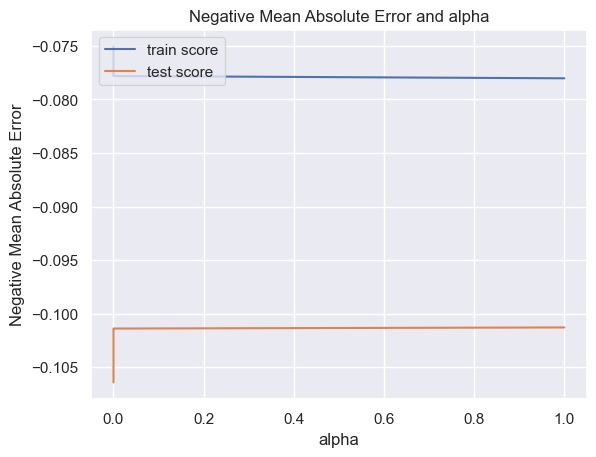

In [112]:
# plotting
plt.plot(ridge_cv_result['param_alpha'], ridge_cv_result['mean_train_score'])
plt.plot(ridge_cv_result['param_alpha'], ridge_cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [113]:
alpha=3.0
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [114]:
# intervept value
ridge.intercept_

10.991221900959308

In [115]:
# coef value
ridge.coef_

array([-1.16122855e-01,  1.21417698e-01,  4.63364530e-01, -7.06294085e-02,
       -8.45542561e-02,  2.68455614e-04,  7.61238084e-02,  3.41375827e-01,
        1.42395716e-01,  3.68389795e-01,  1.31478903e-01,  5.52776253e-02,
        1.46421097e-01,  6.28505440e-02,  1.49203703e-01,  1.03604589e-02,
        2.13034904e-02,  2.07353823e-01,  7.78992674e-02,  8.53560271e-02,
        3.38665426e-02,  1.19204167e-01, -2.77577197e-01,  8.90498461e-03,
        2.70057406e-03,  1.39131281e-01,  1.30389672e-01,  1.60304961e-01,
        1.39316723e-01,  1.02935709e-02, -1.04296628e-01,  4.78260607e-03,
        8.43615832e-02,  2.39248332e-02,  6.28401564e-02,  2.58326121e-02,
       -4.86153910e-02, -6.55503885e-02, -2.64956535e-02,  1.67458216e-02,
       -3.11791348e-02,  0.00000000e+00, -6.58087721e-02, -4.74564938e-02,
        9.10815499e-02, -2.61922763e-03,  1.19856249e-01, -1.03469921e-01,
        4.27270834e-03, -1.09321144e-01, -2.17319867e-01, -3.58154728e-02,
       -2.86366244e-02,  

In [116]:
y_train_pred_ridge=ridge.predict(X_train)
y_test_pred_ridge=ridge.predict(X_test)

In [117]:
rss_ridge=y_train-y_train_pred

In [118]:
model_parameters_ridge=list(ridge.coef_)
model_parameters_ridge.insert(0,ridge.intercept_)
model_parameters_ridge=[round(x,3) for x in model_parameters_ridge]
cols=X.columns
cols=cols.insert(0,'constant')
list(zip(cols,model_parameters_ridge))

[('constant', 10.991),
 ('LotFrontage', -0.116),
 ('LotArea', 0.121),
 ('OverallQual', 0.463),
 ('MasVnrArea', -0.071),
 ('BsmtFinSF1', -0.085),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.076),
 ('1stFlrSF', 0.341),
 ('2ndFlrSF', 0.142),
 ('GrLivArea', 0.368),
 ('BsmtFullBath', 0.131),
 ('BsmtHalfBath', 0.055),
 ('FullBath', 0.146),
 ('HalfBath', 0.063),
 ('BedroomAbvGr', 0.149),
 ('KitchenAbvGr', 0.01),
 ('Fireplaces', 0.021),
 ('GarageArea', 0.207),
 ('WoodDeckSF', 0.078),
 ('OpenPorchSF', 0.085),
 ('EnclosedPorch', 0.034),
 ('ScreenPorch', 0.119),
 ('PoolArea', -0.278),
 ('MiscVal', 0.009),
 ('property_age_years', 0.003),
 ('MSZoning_FV', 0.139),
 ('MSZoning_RH', 0.13),
 ('MSZoning_RL', 0.16),
 ('MSZoning_RM', 0.139),
 ('LotShape_IR2', 0.01),
 ('LotShape_IR3', -0.104),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.084),
 ('LandContour_Low', 0.024),
 ('LandContour_Lvl', 0.063),
 ('LotConfig_CulDSac', 0.026),
 ('LotConfig_FR2', -0.049),
 ('LotConfig_FR3', -0.066),
 ('LotConfig_Inside

#### Calculating the R2_score,rss,mse,rmse values for ridge regression

In [119]:
metric_ridge=[]


# calclating r2 value for train 
r2_score_for_train_ridge=r2_score(y_train,y_train_pred_ridge)
print("the R2 score for train_ridge is:",r2_score_for_train_ridge)
metric_ridge.append(r2_score_for_train_ridge)
# ........................................................................................>
# calclating r2 value for test 
r2_score_for_test_ridge=r2_score(y_test,y_test_pred_ridge)
print("the R2 score for test_ridge is:",r2_score_for_test_ridge)
metric_ridge.append(r2_score_for_test_ridge)
# ........................................................................................>
# calclating rss value for train 
rss_for_train_ridge=np.sum(np.square(y_train-y_train_pred_ridge))
print("the rss score for train_ridge is:",rss_for_train_ridge)
metric_ridge.append(rss_for_train_ridge)
# ........................................................................................>
# # calclating rss value for test 
rss_for_test_ridge=np.sum(np.square(y_test-y_test_pred_ridge))
print("the Rss score for test_ridge is:",rss_for_test_ridge)
metric_ridge.append(rss_for_test_ridge)
# ........................................................................................>
# calclating mse value for train 
mse_for_train_ridge=mean_squared_error(y_train,y_train_pred_ridge)
print("the mse score for train_ridge is:",mse_for_train_ridge)
metric_ridge.append(mse_for_train_ridge)
# ........................................................................................>
# calclating mse value for test 
mse_for_test_ridge=mean_squared_error(y_test,y_test_pred_ridge)
print("the mse score for test_ridge is:",mse_for_test_ridge)
metric_ridge.append(mse_for_test_ridge)
# ........................................................................................>
# calclating rmse value for train 
rmse_for_train_ridge=mse_for_train_ridge**0.5
print("the rmse score for train_ridge is:",rmse_for_train_ridge)
metric_ridge.append(rmse_for_train_ridge)
# ........................................................................................>
# # calclating rmse value for test 
rmse_for_test_ridge=mse_for_test_ridge**0.5
print("the rmse score for t_ridge is:",rmse_for_test_ridge)
metric_ridge.append(rmse_for_test_ridge)


the R2 score for train_ridge is: 0.8968074572860429
the R2 score for test_ridge is: 0.8379249657753158
the rss score for train_ridge is: 12.72370840201823
the Rss score for test_ridge is: 8.51081489888161
the mse score for train_ridge is: 0.01299663779572853
the mse score for test_ridge is: 0.020263844997337167
the rmse score for train_ridge is: 0.11400279731536647
the rmse score for t_ridge is: 0.14235113275747815


In [120]:
# Create a dataframe for Ridge Coefficients
mod_ridge=list(zip(cols,model_parameters_ridge))

In [121]:
coeff_ridge=pd.DataFrame(mod_ridge)
coeff_ridge.columns=['variable','coeff']
coeff_ridge=coeff_ridge.sort_values(by=['coeff'],ascending=False)
coeff_ridge.head()

,variable,coeff
0,constant,10.991
3,OverallQual,0.463
10,GrLivArea,0.368
8,1stFlrSF,0.341
18,GarageArea,0.207


In [122]:
coeff_ridge.shape

(198, 2)

In [123]:
coeff_ridge=pd.DataFrame(coeff_ridge[(coeff_ridge['coeff']>=0.1)])
coeff_ridge

,variable,coeff
0,constant,10.991
3,OverallQual,0.463
10,GrLivArea,0.368
8,1stFlrSF,0.341
18,GarageArea,0.207
28,MSZoning_RL,0.160
15,BedroomAbvGr,0.149
13,FullBath,0.146
9,2ndFlrSF,0.142
26,MSZoning_FV,0.139


In [124]:
# lenght 
len(pd.DataFrame(coeff_ridge[(coeff_ridge['coeff']>=0.1)]))

20

### Lasso Regression

In [125]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)

X_train (979, 197)
y_train (979,)


In [126]:
params={'alpha':[0.0001,0.001,0.01,0.05,
                 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                 20,50,100,500,1000]}
lasso=Lasso()
folds=5
model_cv_lasso=GridSearchCV(estimator=lasso,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                    cv=folds,verbose=1,return_train_score=True)
model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
print('best params:',model_cv_lasso.best_params_)
print('best score :',model_cv_lasso.best_score_)
print('best index :',model_cv_lasso.best_index_)

best params: {'alpha': 0.0001}
best score : -0.10066474764473729
best index : 0


In [128]:
model_cv_lasso.cv_results_

{'mean_fit_time': array([0.07277713, 0.02504869, 0.02331862, 0.02314577, 0.01954226,
        0.01920481, 0.01819849, 0.01445251, 0.01631804, 0.01642437,
        0.01970115, 0.01348901, 0.01778769, 0.01887794, 0.01523328,
        0.01957221, 0.01957936, 0.0192627 , 0.01640697, 0.01706805,
        0.01847281, 0.01657367, 0.02182951, 0.01849141, 0.02010741,
        0.01726966, 0.02100759, 0.02157645]),
 'std_fit_time': array([0.01144153, 0.00322062, 0.00403467, 0.00329423, 0.00134135,
        0.00164629, 0.00241219, 0.00242949, 0.00307359, 0.0038133 ,
        0.00237059, 0.00081976, 0.00281302, 0.00350001, 0.00291987,
        0.00305703, 0.003303  , 0.00325763, 0.00349711, 0.00262283,
        0.00257661, 0.00245418, 0.00145054, 0.00185573, 0.00081073,
        0.00278388, 0.00092066, 0.00089937]),
 'mean_score_time': array([0.00625129, 0.00743551, 0.0089757 , 0.00845695, 0.00851231,
        0.00914364, 0.00793223, 0.00618238, 0.00694113, 0.00790038,
        0.00694318, 0.00617747, 0.008796

In [129]:
cv_result_lasso=pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_lasso=cv_result_lasso[cv_result_lasso['param_alpha']<=1]
cv_result_lasso.head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072777,0.011442,0.006251,0.002195,0.0001,{'alpha': 0.0001},-0.105846,-0.091165,-0.100526,-0.099720,-0.106067,-0.100665,0.005426,1,-0.073416,-0.081269,-0.079445,-0.073971,-0.076686,-0.076957,0.003043
1,0.025049,0.003221,0.007436,0.001813,0.001,{'alpha': 0.001},-0.102585,-0.097002,-0.107788,-0.102165,-0.102025,-0.102313,0.003416,2,-0.086634,-0.093056,-0.091701,-0.087203,-0.090405,-0.089800,0.002504
2,0.023319,0.004035,0.008976,0.001256,0.01,{'alpha': 0.01},-0.136812,-0.150855,-0.151167,-0.152474,-0.147354,-0.147733,0.005717,3,-0.141310,-0.141668,-0.140654,-0.143371,-0.141355,-0.141671,0.000911
3,0.023146,0.003294,0.008457,0.001910,0.05,{'alpha': 0.05},-0.189849,-0.225669,-0.224972,-0.211836,-0.203398,-0.211145,0.013536,4,-0.210311,-0.208490,-0.207804,-0.208399,-0.206122,-0.208225,0.001346


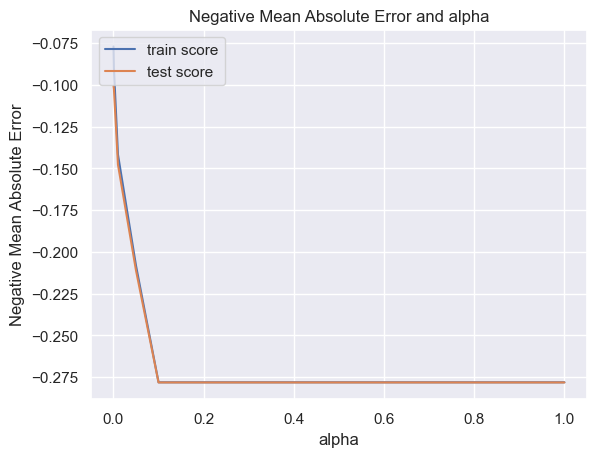

In [130]:
# plotting 
cv_result_lasso['param_alpha']=cv_result_lasso['param_alpha'].astype('float32')
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()
plt.show()

In [131]:
# taking alpha value 0.0001
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [132]:
# lasso intercept
lasso.intercept_

10.81594331957829

In [133]:
# lasso coef
lasso.coef_

array([-1.23818013e-01,  1.11072004e-01,  5.20420301e-01, -8.38616583e-02,
       -7.79860779e-02,  0.00000000e+00,  0.00000000e+00,  4.18419078e-02,
       -0.00000000e+00,  9.72351931e-01,  1.38174825e-01,  6.43866887e-02,
        1.27810787e-01,  5.09997281e-02,  1.01802827e-01, -0.00000000e+00,
        0.00000000e+00,  2.11210425e-01,  7.08964192e-02,  6.87566267e-02,
        3.01033453e-02,  1.34887337e-01, -4.05045894e-01,  0.00000000e+00,
       -5.68554681e-03,  1.84675593e-01,  1.79318078e-01,  2.01606669e-01,
        1.74329895e-01,  1.83402042e-03, -8.45408231e-02,  2.30557902e-03,
        8.46679207e-02,  2.12555169e-02,  6.32173358e-02,  2.25145508e-02,
       -3.71962291e-02, -4.34747229e-02, -2.41018579e-02,  1.50102296e-02,
       -1.44445707e-02,  0.00000000e+00, -3.55397906e-02, -2.36712271e-02,
        1.19263755e-01,  1.20717291e-02,  1.29814942e-01, -8.44595087e-02,
        2.15703384e-02, -7.83322049e-02, -1.91984205e-01, -1.26375253e-02,
       -1.10356093e-02,  

In [134]:
model_parameters_lasso=list(lasso.coef_)
model_parameters_lasso.insert(0,lasso.intercept_)
model_parameters_lasso=[round(x,3) for x in model_parameters_lasso]
cols=X.columns
cols=cols.insert(0,'constant')

In [135]:
mod_lasso=list(zip(cols,model_parameters_lasso))

In [136]:
mod_lasso

[('constant', 10.816),
 ('LotFrontage', -0.124),
 ('LotArea', 0.111),
 ('OverallQual', 0.52),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.078),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.042),
 ('2ndFlrSF', -0.0),
 ('GrLivArea', 0.972),
 ('BsmtFullBath', 0.138),
 ('BsmtHalfBath', 0.064),
 ('FullBath', 0.128),
 ('HalfBath', 0.051),
 ('BedroomAbvGr', 0.102),
 ('KitchenAbvGr', -0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.211),
 ('WoodDeckSF', 0.071),
 ('OpenPorchSF', 0.069),
 ('EnclosedPorch', 0.03),
 ('ScreenPorch', 0.135),
 ('PoolArea', -0.405),
 ('MiscVal', 0.0),
 ('property_age_years', -0.006),
 ('MSZoning_FV', 0.185),
 ('MSZoning_RH', 0.179),
 ('MSZoning_RL', 0.202),
 ('MSZoning_RM', 0.174),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.085),
 ('LotShape_Reg', 0.002),
 ('LandContour_HLS', 0.085),
 ('LandContour_Low', 0.021),
 ('LandContour_Lvl', 0.063),
 ('LotConfig_CulDSac', 0.023),
 ('LotConfig_FR2', -0.037),
 ('LotConfig_FR3', -0.043),
 ('LotConfig_Inside', -0

In [137]:
coeff_lasso=pd.DataFrame(mod_lasso)
coeff_lasso.columns=['variable','coef']
coeff_lasso=coeff_lasso.sort_values(['coef'],ascending=False)

In [138]:
coeff_lasso

,variable,coef
0,constant,10.816
10,GrLivArea,0.972
3,OverallQual,0.520
18,GarageArea,0.211
28,MSZoning_RL,0.202
26,MSZoning_FV,0.185
27,MSZoning_RH,0.179
29,MSZoning_RM,0.174
57,Neighborhood_NridgHt,0.142
11,BsmtFullBath,0.138


In [139]:
len(coeff_lasso[(coeff_lasso['coef']>=0.1)])

21

In [140]:
coeff_lasso=coeff_lasso[(coeff_lasso['coef']>=0.1)]
coeff_lasso=coeff_lasso.sort_values(['coef'],ascending=False)

In [141]:
coeff_lasso

,variable,coef
0,constant,10.816
10,GrLivArea,0.972
3,OverallQual,0.520
18,GarageArea,0.211
28,MSZoning_RL,0.202
26,MSZoning_FV,0.185
27,MSZoning_RH,0.179
29,MSZoning_RM,0.174
57,Neighborhood_NridgHt,0.142
11,BsmtFullBath,0.138


In [142]:
# shape of the lasso 
coeff_lasso.shape

(21, 2)

In [143]:
y_train_pred_lasso=lasso.predict(X_train)
y_test_pred_lasso=lasso.predict(X_test)

In [144]:
y_train_pred_lasso

array([12.34002616, 12.04937127, 12.02532179, 12.16060106, 11.44970834,
       11.67801593, 12.3647295 , 12.43133429, 11.68274917, 11.71449859,
       12.31795271, 11.64727889, 11.69670978, 12.19177693, 12.1435597 ,
       11.87431023, 11.48956884, 11.81038398, 12.07178631, 11.82530415,
       11.8806998 , 11.7124424 , 11.9658233 , 12.49235478, 11.51646573,
       12.22060076, 11.85007762, 11.23791091, 11.28064301, 11.63909119,
       12.66953504, 12.04922004, 11.94932173, 12.62493396, 12.20102413,
       11.84798166, 12.27121497, 11.87948691, 12.05032439, 11.38573018,
       11.86084349, 12.00124903, 12.54811514, 12.192412  , 11.88824441,
       11.99909322, 12.04816478, 12.12535405, 11.75171869, 12.56431773,
       11.54117041, 12.378426  , 11.7977402 , 12.3172644 , 12.08952973,
       12.03196431, 12.13854895, 11.77636375, 11.95858834, 11.81037341,
       12.36541079, 12.08108708, 11.67967712, 11.82609007, 11.57957884,
       12.44393023, 12.07265008, 11.75181126, 11.99685436, 12.02

In [145]:
y_test_pred_lasso

array([12.44822062, 12.49425747, 12.51138085, 11.96300434, 11.98559687,
       12.49575215, 11.78573342, 12.59378382, 11.72726859, 12.18318768,
       12.89858467, 12.40960252, 12.26623808, 11.91607414, 12.47625136,
       11.89585117, 12.21048557, 12.88527661, 12.33008674, 12.33869865,
       11.93946125, 11.65318022, 11.8718703 , 11.40527715, 12.24492938,
       12.60927754, 11.81424028, 11.48281973, 11.77759701, 12.01533228,
       12.49319154, 11.52887502, 12.15078308, 11.56469685, 11.72926144,
       12.2170203 , 11.1580817 , 11.70715539, 11.97835219, 12.11618233,
       11.96474206, 11.70770542, 11.81565636, 11.90586227, 12.25383095,
       11.90929693, 11.9716907 , 11.73442652, 11.91541458, 11.67358836,
       12.2106914 , 11.80772899, 12.01842057, 12.301694  , 12.2006011 ,
       12.17657445, 12.77922169, 12.04691962, 11.7805326 , 12.2087225 ,
       11.65423442, 11.5604259 , 12.08705183, 12.15670024, 12.76538059,
       12.35771398, 11.34769464, 12.03437819, 12.23633387, 12.09

In [146]:
rss_lasso=y_train-y_train_pred_lasso

#### Calculating the R2_score,rss,mse,rmse values for lasso regression

In [147]:
metric_lasso=[]


# calclating r2 value for train 
r2_score_for_train_lasso=r2_score(y_train,y_train_pred_lasso)
print("the R2 score for train_lasso is:",r2_score_for_train_lasso)
metric_lasso.append(r2_score_for_train_lasso)
# ........................................................................................>
# calclating r2 value for test 
r2_score_for_test_lasso=r2_score(y_test,y_test_pred_lasso)
print("the R2 score for test_lasso is:",r2_score_for_test_lasso)
metric_lasso.append(r2_score_for_test_lasso)
# ........................................................................................>
# calclating rss value for train 
rss_for_train_lasso=np.sum(np.square(y_train-y_train_pred_lasso))
print("the rss score for train_lasso is:",rss_for_train_lasso)
metric_lasso.append(rss_for_train_lasso)
# ........................................................................................>
# # calclating rss value for test 
rss_for_test_lasso=np.sum(np.square(y_test-y_test_pred_lasso))
print("the Rss score for test_lasso is:",rss_for_test_lasso)
metric_lasso.append(rss_for_test_lasso)
# ........................................................................................>
# calclating mse value for train 
mse_for_train_lasso=mean_squared_error(y_train,y_train_pred_lasso)
print("the mse score for train_lasso is:",mse_for_train_lasso)
metric_lasso.append(mse_for_train_lasso)
# ........................................................................................>
# calclating mse value for test 
mse_for_test_lasso=mean_squared_error(y_test,y_test_pred_lasso)
print("the mse score for test_lasso is:",mse_for_test_lasso)
metric_lasso.append(mse_for_test_lasso)
# ........................................................................................>
# calclating rmse value for train 
rmse_for_train_lasso=mse_for_train_lasso**0.5
print("the rmse score for train_lasso is:",rmse_for_train_lasso)
metric_lasso.append(rmse_for_train_lasso)
# ........................................................................................>
# # calclating rmse value for test 
rmse_for_test_lasso=mse_for_test_lasso**0.5
print("the rmse score for t_lasso is:",rmse_for_test_lasso)
metric_lasso.append(rmse_for_test_lasso)


the R2 score for train_lasso is: 0.8971683001148794
the R2 score for test_lasso is: 0.8008931994297012
the rss score for train_lasso is: 12.67921624384164
the Rss score for test_lasso is: 10.45541117957244
the mse score for train_lasso is: 0.012951191260308111
the mse score for test_lasso is: 0.024893836141839144
the rmse score for train_lasso is: 0.1138033007443462
the rmse score for t_lasso is: 0.15777780623978502


In [148]:
# creating a table which contain all metrics
lr_table1={'Metrics':['R2 Score (Train)','R2 Score (Test)','RSS(Train)',
                    'RSS(Test)','MSE(Train)','MSE(Test)','RMSE(Train)','RMSE(Test)'],'Linear Regression':metric_linear
          ,'Ridge Regression':metric_ridge,'Lasso Regression':metric_lasso}

In [162]:
final_table=pd.DataFrame(lr_table1,columns=['Metrics','Linear Regression','Ridge Regression','Lasso Regression'])


### Lets Observe The Changes In The Coefficients After The Regularisation

In [150]:
beta=pd.DataFrame(X.columns)


In [151]:
beta['linear']=lm.coef_
beta['ridge']=ridge.coef_
beta['lasso']=lasso.coef_

In [152]:
beta

,0,linear,ridge,lasso
0,LotFrontage,-1.959600e-01,-0.116123,-0.123818
1,LotArea,2.774817e-01,0.121418,0.111072
2,OverallQual,5.030293e-01,0.463365,0.520420
3,MasVnrArea,-8.180627e-02,-0.070629,-0.083862
4,BsmtFinSF1,-1.496932e-01,-0.084554,-0.077986
5,BsmtFinSF2,2.055015e-02,0.000268,0.000000
6,TotalBsmtSF,-8.107038e-03,0.076124,0.000000
7,1stFlrSF,-1.018710e+00,0.341376,0.041842
8,2ndFlrSF,-4.117636e-01,0.142396,-0.000000
9,GrLivArea,2.335524e+00,0.368390,0.972352


In [153]:
final_table

,Metrics,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.953741e-01,0.896807,0.897168
1,R2 Score (Test),-2.378887e+22,0.837925,0.800893
2,RSS(Train),1.290044e+01,12.723708,12.679216
3,RSS(Test),1.249191e+24,8.510815,10.455411
4,MSE(Train),1.317717e-02,0.012997,0.012951
5,MSE(Test),2.974264e+21,0.020264,0.024894
6,RMSE(Train),1.147918e-01,0.114003,0.113803
7,RMSE(Test),5.453682e+10,0.142351,0.157778


In [154]:
# lasso shape
coeff_lasso.shape

(21, 2)

In [155]:
# ridge shape
coeff_ridge.shape

(20, 2)

### Better to use Lasso Regression

In [156]:
coeff_lasso.shape

(21, 2)

In [164]:
coeff_lasso.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17','x18','x19','x20']), inplace = True) 
coeff_lasso.head()

,variable,coef
C,constant,10.816
x1,GrLivArea,0.972
x2,OverallQual,0.520
x3,GarageArea,0.211
x4,MSZoning_RL,0.202


In [158]:
final_table

,Metrics,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.953741e-01,0.896807,0.897168
1,R2 Score (Test),-2.378887e+22,0.837925,0.800893
2,RSS(Train),1.290044e+01,12.723708,12.679216
3,RSS(Test),1.249191e+24,8.510815,10.455411
4,MSE(Train),1.317717e-02,0.012997,0.012951
5,MSE(Test),2.974264e+21,0.020264,0.024894
6,RMSE(Train),1.147918e-01,0.114003,0.113803
7,RMSE(Test),5.453682e+10,0.142351,0.157778


<font color= 'green' style = 'font-family:Cambria ; font-size:18px'>It looks like your Ridge and Lasso Regression models are performing significantly better than the Linear Regression model, especially when considering metrics like R2 Score, RSS, MSE, and RMSE. Here are some observations </font>

- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'> `R2 Score (Test):` </font><br>

    - <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'> `Linear Regression :` Negative R2 score on the test set indicates that the model is not fitting the data well.</font>
    - <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'> `Ridge Regression :` Achieved a positive R2 score, indicating a better fit than Linear Regression.</font>
    - <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'> `Lasso Regression :` Also achieved a positive R2 score, suggesting a good fit.</font>
<font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>`RSS (Test) and MSE (Test) :` Both Ridge and Lasso Regression models have lower RSS and MSE on the test set compared to Linear Regression, indicating better predictive performance. </font>


<font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>` RMSE (Test) :` The RMSE values for both Ridge and Lasso Regression on the test set are lower than that of Linear Regression, again pointing to improved performance.</font>

<font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>`General Comments :`</font><br>

  - <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'> The regularization techniques (Ridge and Lasso) seem to be helping in preventing overfitting, leading to better generalization to the test set.</font>
  - <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>  The choice between Ridge and Lasso may depend on the specific characteristics of your data and the importance of feature selection.</font>


<font color= 'green' style = 'font-family:verdana ; font-size:15px'>Overall, it appears that Ridge and Lasso Regression are more suitable for your data than Linear Regression. Keep in mind that the choice between Ridge and Lasso might depend on whether you want to retain all features (Ridge) or perform feature selection (Lasso). If you're satisfied with the model performance and it meets your objectives, you've done a good job! If you have any specific  </font>


- <font color= 'brown' style = 'font-family:Cambria ; font-size:18px'> `Observations :` </font><br>

  - <font color= 'teal' style = 'font-family:Cambria ; font-size:18px'>Finally, upon examining the table displaying the scores for both the training and test cases, it becomes evident that while linear regression yielded a satisfactory training score, the corresponding test score was notably low. In response to this, we explored Lasso and Ridge regression techniques.</font>

  - <font color= 'teal' style = 'font-family:Cambria ; font-size:18px'>Upon employing Ridge regression, the R2 square for both the training and test sets experienced a slight increase. Notably, the test R2 square saw a substantial improvement. On the other hand, when Lasso regression was applied, there was a slight increase in R2 square, but the test R2 square decreased.</font>

  - <font color= 'teal' style = 'font-family:Cambria ; font-size:18px'> Furthermore, after implementing Ridge regression, the dataset was left with 193 rows. Following Lasso regression, the dataset was reduced to 155 rows, indicating the removal of some irrelevant features that were deemed insignificant.</font>
<hr style="color: black; height: 0.5px;">

<font color='green' style='font-family:Cambria; font-size:18px'>Based on the coefficients from both `Lasso and Ridge regression`, you can make the following observations:</font>


<font color='brown' style='font-family:Cambria; font-size:18px'>Model Evaluation</font><br>

<font color='brown' style='font-family:Cambria; font-size:18px'>Lasso Regression Coefficients:</font><br>

   - <font color='black' style='font-family:Cambria; font-size:18px'>Some coefficients have been exactly zeroed out by Lasso, which implies feature selection. Lasso tends to encourage sparsity by driving some coefficients to exactly zero.</font>
   
   - <font color='black' style='font-family:Cambria; font-size:18px'> The remaining non-zero coefficients indicate the features that Lasso considers important for the model.</font>
 

<font color='brown' style='font-family:Cambria; font-size:18px'>Important Lasso Features:</font><br>

<font color='brown' style='font-family:Cambria; font-size:18px'>`GrLivArea, OverallQual, GarageArea, MSZoning_RL, MSZoning_FV, Neighborhood_NridgHt, BsmtFullBath, ScreenPorch, FullBath, LotArea, and others`</font>

<font color='brown' style='font-family:Cambria; font-size:18px'>Ridge Regression Coefficients:</font><br>


   - <font color='black' style='font-family:Cambria; font-size:18px'>Ridge regression doesn't enforce sparsity like Lasso does. The coefficients are shrunk towards zero but don't become exactly zero.</font>
   
   - <font color='black' style='font-family:Cambria; font-size:18px'> Ridge regression includes all features, but the magnitudes are adjusted based on regularization.</font>
 

<font color='brown' style='font-family:Cambria; font-size:18px'>Important Ridge Features:</font><br>

<font color='brown' style='font-family:Cambria; font-size:18px'>`OverallQual, GrLivArea, 1stFlrSF, GarageArea, MSZoning_RL, BedroomAbvGr, FullBath, 2ndFlrSF, MSZoning_FV, MSZoning_RM, Neighborhood_NridgHt, BsmtFullBath, MSZoning_RH, LotArea, Neighborhood_Crawfor, ScreenPorch, HouseStyle_2.5Unf, Foundation_Stone, Neighborhood_NoRidge, and others.` </font>

<font color='brown' style='font-family:Cambria; font-size:18px'>Overall Model Evaluation:</font><br>


<font color='black' style='font-family:Cambria; font-size:18px'>Both `Lasso and Ridge` models seem to be considering `similar features` (e.g., GrLivArea, OverallQual, GarageArea), `indicating` some consensus on `important predictors`.</font>



<font color= 'brown' style = 'font-family:Cambria ; font-size:18px'>The Final Equation Is Which Is Used To Predict The Final House Price</font><br>

$$
\log(Y) = C + 0.972x_1 + 0.520x_2 + 0.211x_3 + 0.202x_4 + 0.185x_5 + 0.179x_6 + 0.174x_7 + 0.142x_8 + 0.138x_9 + 0.135x_{10} + 0.130x_{11} + 0.128x_{12} + 0.119x_{13} + 0.117x_{14} + 0.115x_{15} + 0.114x_{16} + 0.111x_{17} + 0.104x_{18} + 0.103x_{19} + 0.102x_{20} + \text{(Error term)}
$$

